In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('student_performance.xlsx')
df.head()

,school,Gedner,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.columns

Index(['school', 'Gedner', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Data Analysis

#### 1. School Column

In [5]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [6]:
df['school'].value_counts()
# GP: Gabriel Pereira and MS: - Mousinho da Silveira

GP    349
MS     46
Name: school, dtype: int64

<AxesSubplot:xlabel='school', ylabel='count'>

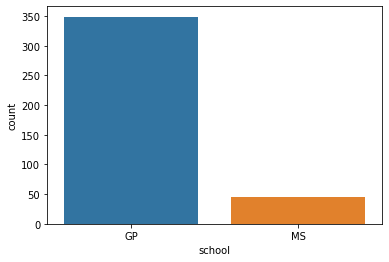

In [7]:
sns.countplot(x = 'school', data = df)

#### 2. Gender Column

In [8]:
df.rename(columns = {'Gedner': 'gender'}, inplace = True) # # renaming column 
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
df['gender'].value_counts()

F    208
M    187
Name: gender, dtype: int64

#### Relation between school and gender

<AxesSubplot:xlabel='school', ylabel='count'>

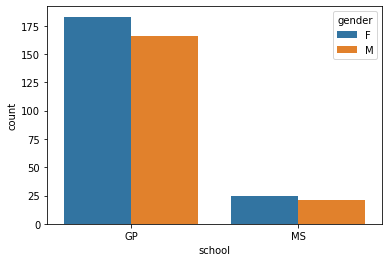

In [11]:
sns.countplot(x='school', hue='gender', data = df)

In [12]:
df.loc[(df['school'] == 'GP') & (df['gender'] == 'F')].shape
# Number of female student at GP school

(183, 33)

In [13]:
df.loc[(df['school'] == 'GP') & (df['gender'] == 'M')].shape
# Number of male student at GP school

(166, 33)

In [14]:
df.loc[(df['school'] == 'MS') & (df['gender'] == 'F')].shape
# Number of female student at MS school

(25, 33)

In [15]:
df.loc[(df['school'] == 'MS') & (df['gender'] == 'M')].shape
# Number of male student at MS school

(21, 33)

#### 3. Age Column

(array([284., 106.,   5.]),
 array([15.        , 17.33333333, 19.66666667, 22.        ]),
 [<matplotlib.patches.Polygon at 0x260379a4af0>])

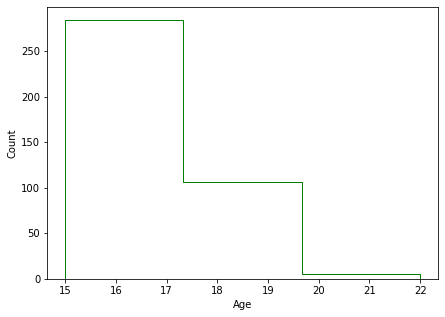

In [16]:
plt.figure(figsize=(7,5))
plt.xlabel('Age')
plt.ylabel('Count')

plt.hist(df['age'], rwidth = 0.95, color = 'green', bins = 3, histtype='step')

In [17]:
third_age_group = df.loc[df['age'] >= 20]
third_age_group.shape

(5, 33)

In [18]:
first_age_group = df.loc[(df['age'] >= 15) & (df['age'] <= 17)]
first_age_group.shape

(284, 33)

In [19]:
second_age_group = df.loc[(df['age'] > 17) & (df['age'] < 20)]
second_age_group.shape

(106, 33)

In [20]:
df.shape

(395, 33)

In [21]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [22]:
df.loc

#### Age vs Gender

In [23]:
df.loc[(df['age'] >= 20) & (df['gender'])].shape

(5, 33)

In [24]:
df.loc[(df['age'] >= 20 ) & (df['gender'] == 'F')].head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15


In [25]:
df.loc[(df['age'] >= 20) & (df['gender'] == 'M')].head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


#### School and Age

In [26]:
first_age_group.loc[first_age_group['school'] == 'GP'].shape

(272, 33)

In [27]:
first_age_group.loc[first_age_group['school'] == 'MS'].shape

(12, 33)

In [28]:
second_age_group.loc[second_age_group['school'] == 'GP'].shape

(75, 33)

In [29]:
second_age_group.loc[second_age_group['school'] == 'MS'].shape

(31, 33)

In [30]:
third_age_group.loc[third_age_group['school'] == 'GP'].shape

(2, 33)

In [31]:
third_age_group.loc[third_age_group['school'] == 'MS'].shape

(3, 33)

### Data Wrangling

#### Data Cleaning: Handle NAN values

In [32]:
df.isnull().sum()

school        0
gender        0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Removing Unnessary Columns

In [33]:
df.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [34]:
df.drop(['age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','failures','nursery',
        'higher','romantic','famrel','Dalc','Walc'], inplace= True, axis =1)

In [35]:
df.head()

,school,gender,studytime,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,2,yes,no,no,no,no,3,4,3,6,5,6,6
1,GP,F,2,no,yes,no,no,yes,3,3,3,4,5,5,6
2,GP,F,2,yes,no,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,3,no,yes,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,2,no,yes,yes,no,no,3,2,5,4,6,10,10


#### 	Label encoding and one hot encoding

In [36]:
df.school.replace({
    'GP': '1',
    'MS': '0',
}, inplace = True)

df.gender.replace({
    'F': '1',
    'M': '0',
}, inplace = True)

df.schoolsup.replace({
    'yes': '1',
    'no': '0',
}, inplace = True)

df.famsup.replace({
    'yes': '1',
    'no': '0',
}, inplace = True)

df.paid.replace({
    'yes': '1',
    'no': '0',
}, inplace = True)

df.activities.replace({
    'yes': '1',
    'no': '0',
}, inplace = True)

df.internet.replace({
    'yes': '1',
    'no': '0',
}, inplace = True)

In [37]:
df.head()

,school,gender,studytime,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G1,G2,G3
0,1,1,2,1,0,0,0,0,3,4,3,6,5,6,6
1,1,1,2,0,1,0,0,1,3,3,3,4,5,5,6
2,1,1,2,1,0,1,0,1,3,2,3,10,7,8,10
3,1,1,3,0,1,1,1,1,2,2,5,2,15,14,15
4,1,1,2,0,1,1,0,0,3,2,5,4,6,10,10


In [38]:
final_dataset = pd.get_dummies(df, drop_first=True)
final_dataset.head()

,studytime,freetime,goout,health,absences,G1,G2,G3,school_1,gender_1,schoolsup_1,famsup_1,paid_1,activities_1,internet_1
0,2,3,4,3,6,5,6,6,1,1,1,0,0,0,0
1,2,3,3,3,4,5,5,6,1,1,0,1,0,0,1
2,2,3,2,3,10,7,8,10,1,1,1,0,1,0,1
3,3,2,2,5,2,15,14,15,1,1,0,1,1,1,1
4,2,3,2,5,4,6,10,10,1,1,0,1,1,0,0


#### Build Model

In [39]:
X = final_dataset.drop(['G3'], axis=1)
y = final_dataset['G3']

In [40]:
X.head()

,studytime,freetime,goout,health,absences,G1,G2,school_1,gender_1,schoolsup_1,famsup_1,paid_1,activities_1,internet_1
0,2,3,4,3,6,5,6,1,1,1,0,0,0,0
1,2,3,3,3,4,5,5,1,1,0,1,0,0,1
2,2,3,2,3,10,7,8,1,1,1,0,1,0,1
3,3,2,2,5,2,15,14,1,1,0,1,1,1,1
4,2,3,2,5,4,6,10,1,1,0,1,1,0,0


In [41]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

#### Train Test Model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#### Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8316574032563774

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y)

array([0.81517927, 0.886545  , 0.82675622, 0.76489781, 0.72619135])

#### Use of GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

model_params = {
    'linear regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'decision tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best','random']
        }
    }
    
}

In [47]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best_model = pd.DataFrame(scores, columns=['model','best_score','best_params'])
best_model

,model,best_score,best_params
0,linear regression,0.803914,{'normalize': True}
1,lasso,0.809737,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.693161,"{'criterion': 'mse', 'splitter': 'best'}"


In [48]:
lasso_model = Lasso(alpha=1, selection='cyclic',max_iter=100)
lasso_model.fit(X_train,y_train)
lasso_model.score(X_test, y_test)

0.8336623638862435

In [49]:
lasso_model.predict([[4, 5, 1, 5, 0, 18, 17, 1, 1, 1, 1, 1, 0, 0]])

array([17.02419096])

In [50]:
lasso_model.predict([[1, 1, 1, 1, 1, 15, 14, 1, 1, 1, 1, 1, 1, 1]])

array([13.84913218])